# Tugas Week 2

### 1119007 - Timothy Ray &nbsp;&nbsp;&nbsp;&nbsp; 1119023 - Jedediah Fanuel &nbsp;&nbsp;&nbsp;&nbsp; 1119033 - Fedly Septian

In [799]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats

## Get The Data

In [800]:
vehicles_df = pd.read_csv("Amtrak Passenger Rail Fuel Consumption and Travel.csv")
print(vehicles_df.shape)

(33, 8)


In [801]:
vehicles_df.head(10)

,Year,Number_Of_Locomotives_In_Use,Number_Of_Cars_In_Use,Million_Miles_Traveled_By_Train,Million_Miles_Traveled_By_Car,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons,Average_Miles_Traveled_Per_Car_In_Thousands
0,1975,355,1913,30,253,180,63,132
1,1980,419,2128,30,235,254,64,110
2,1985,291,1854,30,251,295,65,135
3,1990,318,1863,33,301,330,82,162
4,1991,316,1786,34,313,303,82,175
5,1992,336,1796,34,307,300,82,171
6,1993,360,1853,35,303,301,83,164
7,1994,338,1852,34,304,309,74,164
8,1995,313,1722,32,292,336,72,170
9,1996,299,1730,30,276,363,71,160


<hr>

## Missing Value

In [802]:
print("null values: \n")
print(vehicles_df.isna())

null values: 

     Year  Number_Of_Locomotives_In_Use  Number_Of_Cars_In_Use  \
0   False                         False                  False   
1   False                         False                  False   
2   False                         False                  False   
3   False                         False                  False   
4   False                         False                  False   
5   False                         False                  False   
6   False                         False                  False   
7   False                         False                  False   
8   False                         False                  False   
9   False                         False                  False   
10  False                         False                  False   
11  False                         False                  False   
12  False                         False                  False   
13  False                         False                  Fals

In [803]:
print("total null values: ", vehicles_df.isna().sum().sum())

total null values:  0


Dapat dilihat bahwa dataset yang digunakan sudah terbebas dari *missing value*.

## Duplicate Data

In [804]:
duplicate_rows_df = vehicles_df[vehicles_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 8)


Begitu pula dengan *duplicate data*. Tidak terdapat data duplikat pada dataset ini.

<hr>

## Outliers

In [805]:
vehicles_df.describe()

,Year,Number_Of_Locomotives_In_Use,Number_Of_Cars_In_Use,Million_Miles_Traveled_By_Train,Million_Miles_Traveled_By_Car,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons,Average_Miles_Traveled_Per_Car_In_Thousands
count,33.00,33.00,33.00,33.00,33.00,33.00,33.00,33.00
mean,2002.27,352.39,1648.58,35.36,301.70,446.64,70.85,190.18
std,11.09,62.27,381.06,2.78,34.50,111.94,9.93,37.40
min,1975.00,258.00,1164.00,30.00,235.00,180.00,60.00,110.00
25%,1995.00,299.00,1402.00,34.00,276.00,336.00,63.00,164.00
50%,2003.00,338.00,1722.00,36.00,303.00,485.00,66.00,194.00
75%,2011.00,418.00,1863.00,38.00,319.00,537.00,76.00,225.00
max,2019.00,485.00,2896.00,38.00,379.00,582.00,97.00,255.00


Jika dilihat dari jarak data dari max value sampai 75%, variable 'Number_Of_Cars_In_Use' menunjukkan karakteristik outliers. Mari kita coba plot seperti apa bentuknya.

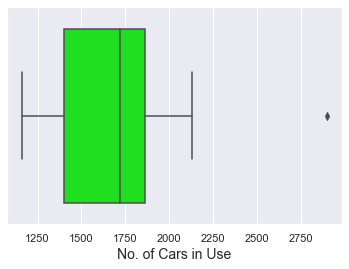

In [806]:
sns.boxplot(x=vehicles_df['Number_Of_Cars_In_Use'], color='lime')
plt.xlabel('No. of Cars in Use', fontsize=14)
plt.show()

Seperti yang diduga, terdapat outliers. Mari kita bersihkan.

#### Insight

Terlihat sepertinya terdapat hanya 1 buah data outliers.

In [807]:
vehicles_cleaned_df=vehicles_df[vehicles_df['Number_Of_Cars_In_Use']<2750]

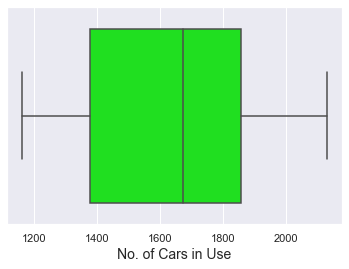

In [808]:
sns.boxplot(x=vehicles_cleaned_df['Number_Of_Cars_In_Use'], color='lime')
plt.xlabel('No. of Cars in Use', fontsize=14)
plt.show()

In [809]:
print(vehicles_cleaned_df.shape)

(32, 8)


#### Insight

Benar adanya bahwa 1 data outliers saja.

Coba kita gunakan Z-Score

In [810]:
vehicles_cleaned_df = vehicles_cleaned_df[(np.abs(stats.zscore(vehicles_cleaned_df)) < 3).all(axis=1)]
print("Shape after rejecting outliers: ", vehicles_cleaned_df.shape)

Shape after rejecting outliers:  (32, 8)


Ternyata memang tidak ada perubahan lebih lanjut.

<hr>


# Examining Assumptions

## Check Linearity with Scatterplot

In [811]:
vehicles_cleaned_df.head(10)

,Year,Number_Of_Locomotives_In_Use,Number_Of_Cars_In_Use,Million_Miles_Traveled_By_Train,Million_Miles_Traveled_By_Car,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons,Average_Miles_Traveled_Per_Car_In_Thousands
0,1975,355,1913,30,253,180,63,132
1,1980,419,2128,30,235,254,64,110
2,1985,291,1854,30,251,295,65,135
3,1990,318,1863,33,301,330,82,162
4,1991,316,1786,34,313,303,82,175
5,1992,336,1796,34,307,300,82,171
6,1993,360,1853,35,303,301,83,164
7,1994,338,1852,34,304,309,74,164
8,1995,313,1722,32,292,336,72,170
9,1996,299,1730,30,276,363,71,160


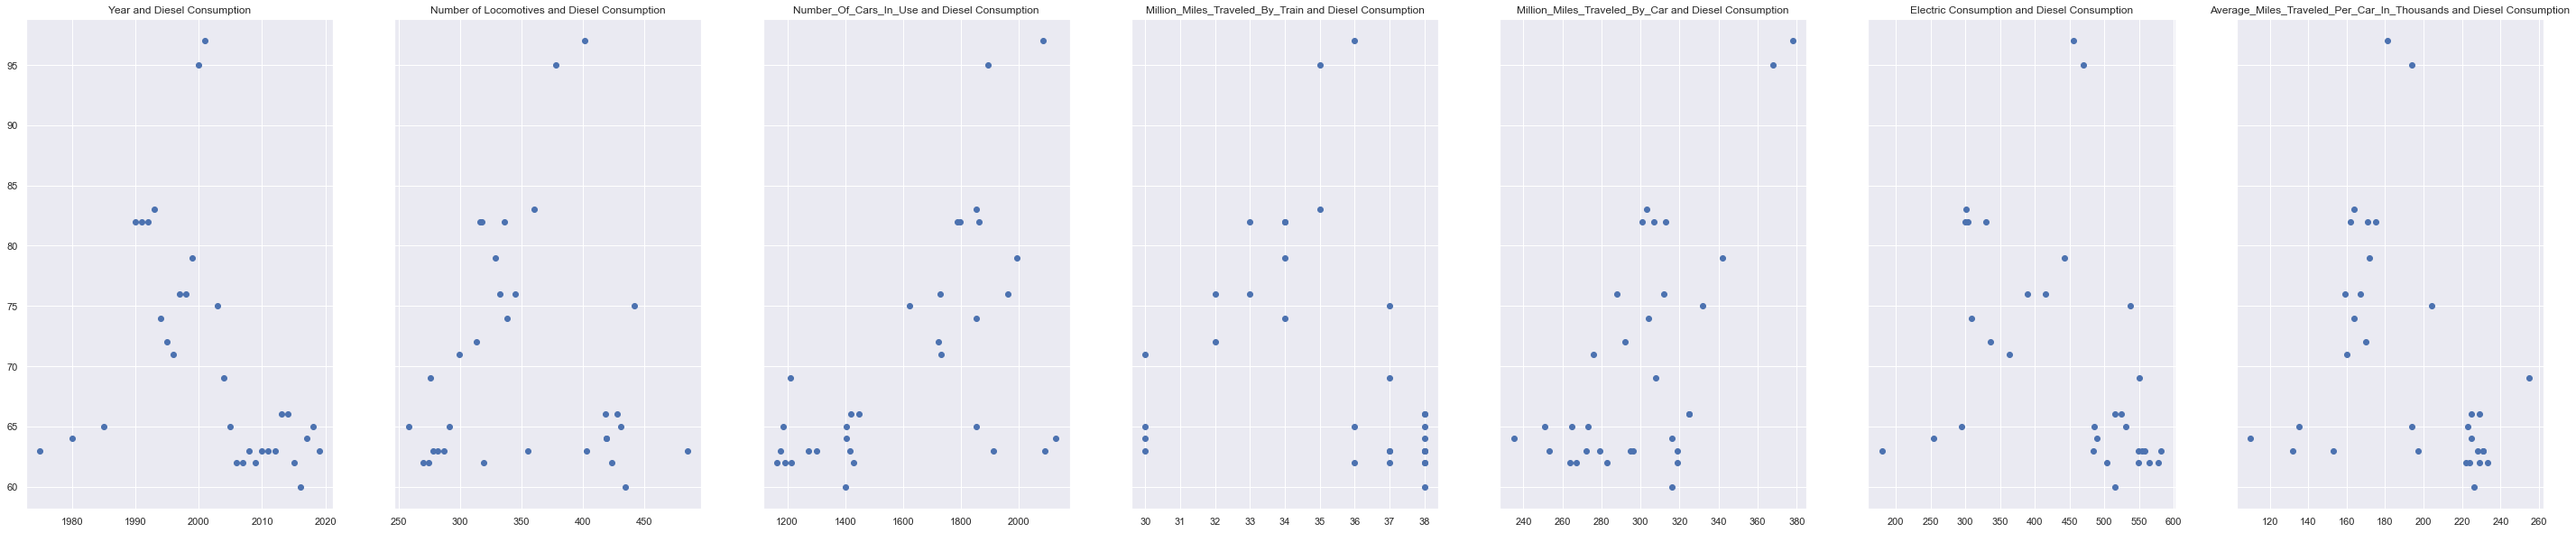

In [812]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, sharey=True, figsize=(50,10))
ax1.scatter(vehicles_cleaned_df['Year'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax1.set_title('Year and Diesel Consumption')
ax2.scatter(vehicles_cleaned_df['Number_Of_Locomotives_In_Use'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax2.set_title('Number of Locomotives and Diesel Consumption')
ax3.scatter(vehicles_cleaned_df['Number_Of_Cars_In_Use'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax3.set_title('Number_Of_Cars_In_Use and Diesel Consumption')
ax4.scatter(vehicles_cleaned_df['Million_Miles_Traveled_By_Train'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax4.set_title('Million_Miles_Traveled_By_Train and Diesel Consumption')
ax5.scatter(vehicles_cleaned_df['Million_Miles_Traveled_By_Car'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax5.set_title('Million_Miles_Traveled_By_Car and Diesel Consumption')
ax6.scatter(vehicles_cleaned_df['Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax6.set_title('Electric Consumption and Diesel Consumption')
ax7.scatter(vehicles_cleaned_df['Average_Miles_Traveled_Per_Car_In_Thousands'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax7.set_title('Average_Miles_Traveled_Per_Car_In_Thousands and Diesel Consumption')

plt.show()

#### Insight

Dapat dilihat, sebaran data dari masing-masing variable cukup menyebar, hal ini mungkin kurang menunjukkan linearitras antar variable. Mari kita coba gunakan *Heatmap*.

<AxesSubplot:>

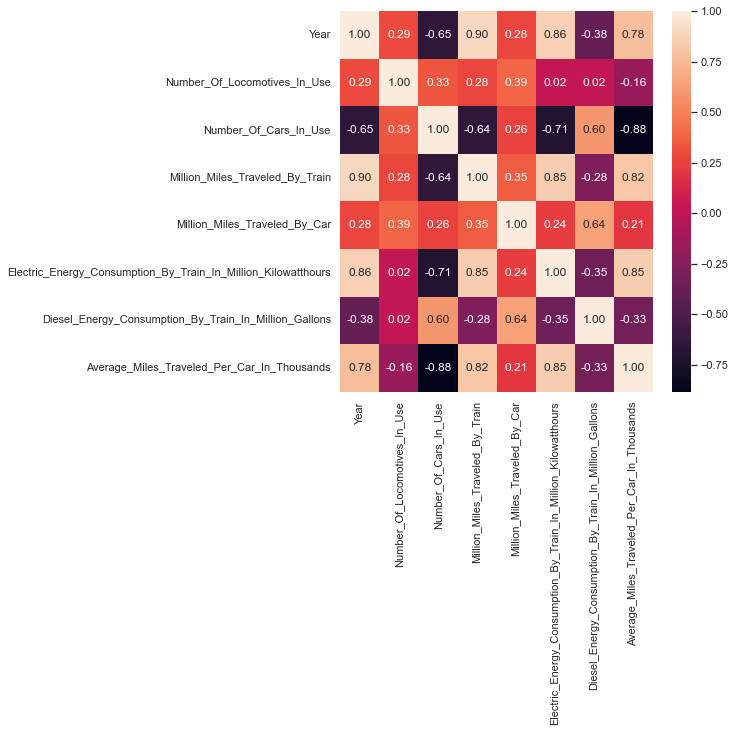

In [813]:
plt.figure(figsize=(7, 7))
# ax = sns.heatmap(vehicles_cleaned_df, annot=True, vmin=0, vmax=1)
sns.heatmap(vehicles_cleaned_df.corr(), annot=True, fmt='.2f')

Variable yang menjadi prediktor adalah 'Diesel Energy Consumption'. Jika dilihat variable yang paling tinggi hubungannya adalah Number of cars in use & Million miles traveled by car.

Text(0.5, 1.0, 'Million_Miles_Traveled_By_Car and Diesel Consumption')

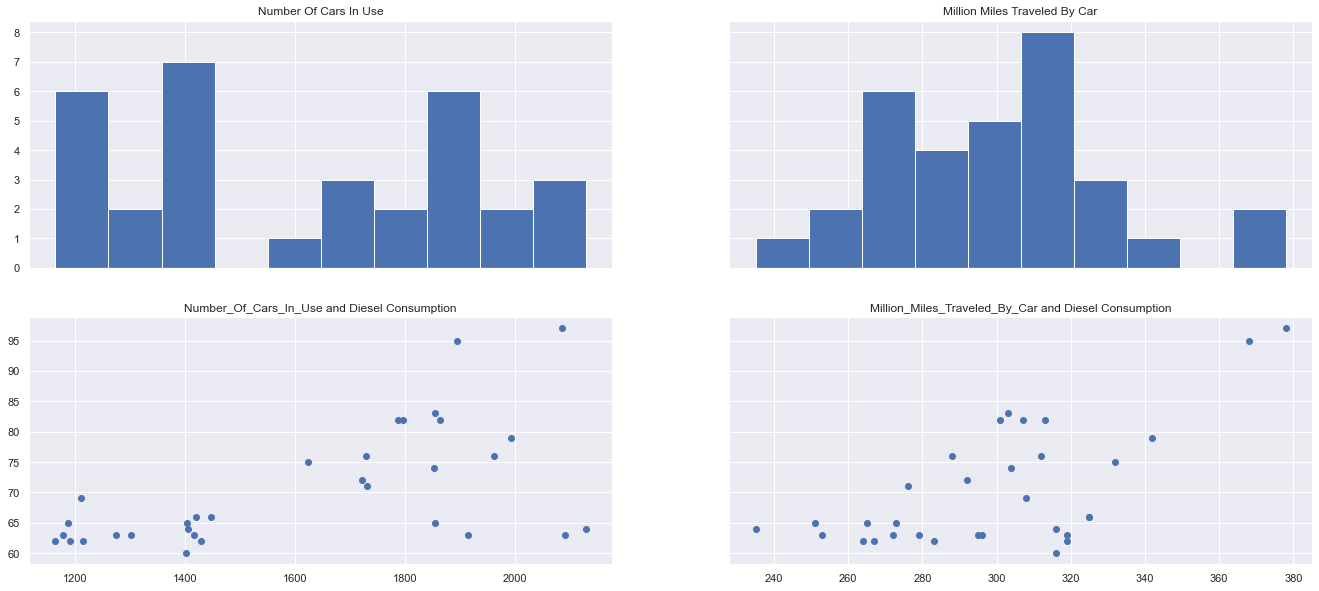

In [814]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', sharex='col', figsize=(23,10))
ax1.hist(vehicles_cleaned_df[['Number_Of_Cars_In_Use']])
ax1.set_title('Number Of Cars In Use')

ax2.hist(vehicles_cleaned_df[['Million_Miles_Traveled_By_Car']])
ax2.set_title('Million Miles Traveled By Car')

ax3.scatter(vehicles_cleaned_df['Number_Of_Cars_In_Use'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax3.set_title('Number_Of_Cars_In_Use and Diesel Consumption')

ax4.scatter(vehicles_cleaned_df['Million_Miles_Traveled_By_Car'], vehicles_cleaned_df['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'])
ax4.set_title('Million_Miles_Traveled_By_Car and Diesel Consumption')

#### Insight

Dapat dilihat, kedua variable tersebut masing-masing terbagi menjadi 2 buah kelompok, baik antara jumlah mobil dengan diesel maupun banyak perjalanan mobil dengan diesel.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

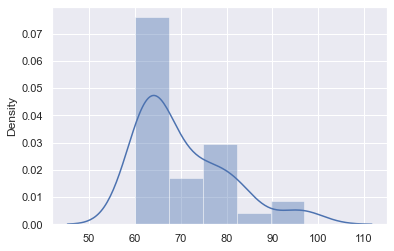

In [815]:
sns.distplot(vehicles_cleaned_df[['Diesel_Energy_Consumption_By_Train_In_Million_Gallons']])

#### Insight

Jika dilihat dari variable diesel, dominan penggunaan pada sekitar 60 jutaan galon.

## Multicolinearity

In [816]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = vehicles_cleaned_df[['Year', 
    'Number_Of_Locomotives_In_Use', 
    'Number_Of_Cars_In_Use',
    'Million_Miles_Traveled_By_Train',
    'Million_Miles_Traveled_By_Car',
    'Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours',
    'Average_Miles_Traveled_Per_Car_In_Thousands',
]]
vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [817]:
vif

,VIF,Features
0,3039.15,Year
1,75.85,Number_Of_Locomotives_In_Use
2,1719.13,Number_Of_Cars_In_Use
3,1319.04,Million_Miles_Traveled_By_Train
4,1315.21,Million_Miles_Traveled_By_Car
5,82.47,Electric_Energy_Consumption_By_Train_In_Millio...
6,2103.08,Average_Miles_Traveled_Per_Car_In_Thousands


In [818]:
data_no_multi = vehicles_df.drop(['Year'],axis=1)
data_no_multi = data_no_multi.drop(['Average_Miles_Traveled_Per_Car_In_Thousands'],axis=1)
data_no_multi = data_no_multi.drop(['Number_Of_Cars_In_Use'],axis=1)

In [819]:
data_no_multi.head()

,Number_Of_Locomotives_In_Use,Million_Miles_Traveled_By_Train,Million_Miles_Traveled_By_Car,Electric_Energy_Consumption_By_Train_In_Million_Kilowatthours,Diesel_Energy_Consumption_By_Train_In_Million_Gallons
0,355,30,253,180,63
1,419,30,235,254,64
2,291,30,251,295,65
3,318,33,301,330,82
4,316,34,313,303,82


## Linear Regression Model

### Declare input and target

In [820]:
targets = data_no_multi['Diesel_Energy_Consumption_By_Train_In_Million_Gallons']
inputs = data_no_multi.drop(['Diesel_Energy_Consumption_By_Train_In_Million_Gallons'], axis=1)

### Scale the data

In [821]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [822]:
inputs_scaled = scaler.transform(inputs)

In [823]:
inputs_scaled

array([[ 0.04249779, -1.95798377, -1.43333562, -2.41893308],
       [ 1.08616434, -1.95798377, -1.96314355, -1.74760286],
       [-1.00116876, -1.95798377, -1.49220316, -1.37564963],
       [-0.56087194, -0.86284031, -0.02051445, -1.05812859],
       [-0.59348652, -0.49779248,  0.33269084, -1.30307339],
       [-0.26734072, -0.49779248,  0.1560882 , -1.33028948],
       [ 0.12403423, -0.13274466,  0.0383531 , -1.32121745],
       [-0.23472614, -0.49779248,  0.06778687, -1.24864121],
       [-0.64240839, -1.22788813, -0.28541842, -1.00369641],
       [-0.87071045, -1.95798377, -0.75635881, -0.7587516 ],
       [-0.33256988, -1.22788813, -0.40315351, -0.51380679],
       [-0.12057511, -0.86284031,  0.30325707, -0.27793401],
       [-0.38149175, -0.49779248,  1.1862703 , -0.0329892 ],
       [ 0.41756545, -0.13274466,  1.95154843,  0.21195561],
       [ 0.79263312,  0.23230316,  2.24588617,  0.08494719],
       [ 0.31972171,  0.9623988 ,  2.27531995,  0.64741305],
       [ 1.461232  ,  0.

## Train Test Split

In [824]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Create the Regression

In [825]:
from sklearn.linear_model import LinearRegression

In [826]:
reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [827]:
y_hat = reg.predict(x_train)

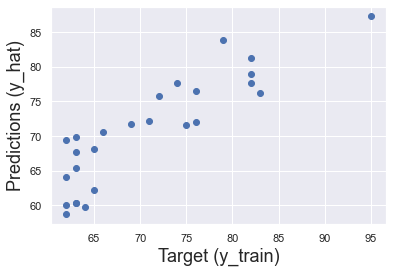

In [828]:
plt.scatter(y_train, y_hat)
plt.xlabel('Target (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.show()

#### Insight

Terlihat prediksi yang banyak meleset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

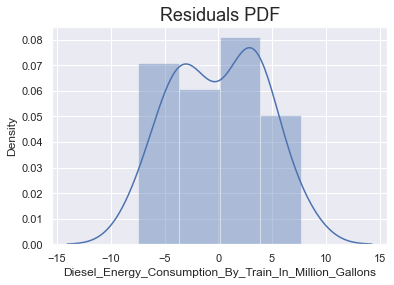

In [829]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [830]:
reg.score(x_train, y_train)

0.7812585620732866

In [831]:
from sklearn.metrics import mean_squared_error
reg_mse = mean_squared_error(y_train,y_hat)
reg_mse

16.95343218534659

In [832]:
reg_mrse = np.sqrt(reg_mse)
reg_mrse

4.1174545759906795

In [833]:
from sklearn.metrics import mean_absolute_error
reg_mae = mean_absolute_error(y_train,y_hat)
reg_mae

3.672800822400941

## Finding the weight and bias

In [834]:
reg.intercept_

71.15716827001404

In [835]:
reg.coef_

array([-2.58514597, -1.49363899,  9.11365255, -3.67224224])

In [836]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weight'] = reg.coef_
reg_summary

,Features,Weight
0,Number_Of_Locomotives_In_Use,-2.59
1,Million_Miles_Traveled_By_Train,-1.49
2,Million_Miles_Traveled_By_Car,9.11
3,Electric_Energy_Consumption_By_Train_In_Millio...,-3.67


## Testing

In [837]:
y_hat_test = reg.predict(x_test)

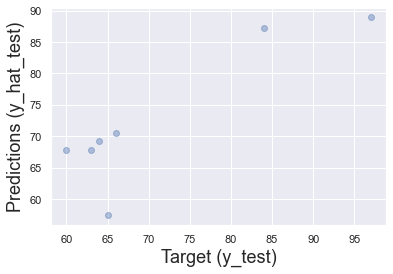

In [838]:
plt.scatter(y_test, y_hat_test, alpha=0.4)
plt.xlabel('Target (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.show()

In [839]:
df_perform = pd.DataFrame(y_hat_test, columns = ['Prediction'])
df_perform['Target'] = y_test.reset_index(drop=True)
df_perform['Residual'] = df_perform['Target'] - df_perform['Prediction']
df_perform['Difference%'] = np.absolute(df_perform['Residual']/df_perform['Target']*100)

df_perform

,Prediction,Target,Residual,Difference%
0,87.25,84,-3.25,3.87
1,69.30,64,-5.30,8.29
2,67.88,63,-4.88,7.75
3,88.92,97,8.08,8.33
4,67.81,60,-7.81,13.01
5,70.59,66,-4.59,6.96
6,57.43,65,7.57,11.65


In [840]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_perform.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
0,87.25,84,-3.25,3.87
5,70.59,66,-4.59,6.96
2,67.88,63,-4.88,7.75
1,69.30,64,-5.30,8.29
3,88.92,97,8.08,8.33
6,57.43,65,7.57,11.65
4,67.81,60,-7.81,13.01


In [841]:
df_perform.describe()

,Prediction,Target,Residual,Difference%
count,7.00,7.00,7.00,7.00
mean,72.74,71.29,-1.46,8.55
std,11.34,13.78,6.49,3.02
min,57.43,60.00,-7.81,3.87
25%,67.84,63.50,-5.09,7.36
50%,69.30,65.00,-4.59,8.29
75%,78.92,75.00,2.16,9.99
max,88.92,97.00,8.08,13.01


### Kesimpulan

Jika dilihat di kolom __'Difference%'__, selisih tidak terlalu jauh, masih dapat diterima. Jadi dapat dikatakan bahwa model yang dihasilkan tidak overfit. Menurut kami ada kekurangan yang sangat berperngaruh terhadap pengerjaan tugas kali ini, yaitu jumlah data yang terlalu sedikit. Kami yakin jika jumlah data diperbanyak, maka model yang dihasilkan akan lebih baik lagi.